# Exploring a datase of used cars from eBay Kleinanzeigen

## Introduction

This is a short data cleaning project, with the goal to put data crawled from eBay on a more useable form.

## The dataset

The dataset we work with, downloaded from [Dataquest](https://app.dataquest.io/m/294/guided-project%3A-exploring-ebay-car-sales-data), is a modified version of a database scrapped by Orges Leka from Ebay-Kleinanzeigen, available on [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data). The original dataset was created on 19 November 2016, last updated (at the time of writing) on 28 November 2016, and contains data of ads for more than 370000 used cars. The one we will use contains a subset of 50000 rows and, for learning purposes, is less clean than the original. 

It has 20 columns: 
* `dateCrawled`: date when the ad was crawled, 
* `name`: name of the car,
* `seller`: indicates whether the seller is private or a professional dealer,
* `offertype`: the type of listing,
* `price`: the price on the ad,
* `abtest`: whether the listing is included in an A/B test,
* `vehicleType`: the type of vehicle,
* `yearOfRegistration`: year when the vehicle was first registered,
* `gearbox`: the transmission type, 
* `powerPS`: power of the vehicle in PS (1PS $\approx$ 0.7355kW),
* `model`: the model of the vehicle,
* `kilometer` : how many kilometers the vehicle has driven,
* `monthOfRegistration`: month when the vehicle was first registered
* `fuelType`: type of fuel used by the vehicle, 
* `brand`: the brand of the vehicle, 
* `notRepairedDamage`: whether the vehicle has some unrepaired damage, 
* `dateCreated`: creation date for the eBay listing, 
* `nrOfPictures`: supposedly the number of pictures in the ad, actually always 0 due to a bug, 
* `postalCode`: postal code for the location of the vehicle,
* `lastSeenOnline`: when the crawler saw the ad online last.

We first import the Pandas and NumPy libraries, which we will use extensively in this project.

In [1]:
import numpy as np
import pandas as pd

We then import the dataset as the Pandas dataframe `autos` and print basic information as well as its first 10 rows. By trial and errors, we found that the encoding is Latin-1. 

In [2]:
autos = pd.read_csv('autos.csv', encoding='Latin-1')
print(autos.info())
autos.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


This confirms that the dataset has 50000 rows and 20 columns. 15 of them seem to have string values, while the 5 columns `yearOfRegistration`, `powerPS`, `monthOfRegistration`, `nrOfPictures`, and `postalCode` have integer values. 

The information is in German and that some of the `vehicleType`, `gearbox`, `model`, `fuelType`, and `notRepairedDamage` are missing (but never ore than 20%). Besides, some entries in the `powerPS` column are 0, which seems impossible. Another, minor, issue is that the column names use camelcase instead of snakecase, preferred in Python.

## Data cleaning

### Column names

We start by deleting the column `nrOfPictures`, which does not provide any information:

In [3]:
autos.drop('nrOfPictures', axis=1, inplace=True);

Let us then focus on the column names:

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

Let us rewrite the column names in snakecase and make some of them more explicit. We first define a function to convert amelcase strings to snakecase ones:

In [5]:
def camel_to_snake_char(c):
    '''
    returns c if c is not uppercase and '_'+c.lower() if it is
    c: char
    '''
    if c.isupper():
        return '_'+c.lower()
    else:
        return c  

def camel_to_snake(s):
    '''
    returns the snakecase version of the camelcase string s
    '''
    return ''.join([s[0]]+list(map(camel_to_snake_char, s[1:])))

We then give to four columns shorter names and put them all in snakecase:

In [6]:
autos.rename(columns={'yearOfRegistration':'registrationYear', 
                      'monthOfRegistration':'registrationMonth', 
                      'notRepairedDamage':'unepairedDamage', 
                      'dateCreated':'adCreated'}, inplace=True)
autos.columns = list(map(camel_to_snake, autos.columns))
autos.head(10)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer,registration_month,fuel_type,brand,unepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,15749,2016-04-06 10:46:35


### Numerical columns

Let us now have a closer look at the resulting dataframe:

In [7]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer,registration_month,fuel_type,brand,unepaired_damage,ad_created,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,39481
top,2016-03-30 17:37:35,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,71540.000000,NaN


We observe that:
* The columns `seller` and `offer_type` have only 2 different values each, with one of them appearing only once. The different value may be an erros, in which case the corresponding column offers no information and can be dropped.
* The `price` and `odometer` columns have numbers written as strings. We will want to convert them to numerical values. 
Let us deal with the first point and unvestigate the columns `seller` and `offer_type`:

In [8]:
print(autos['seller'].value_counts())
print(autos['offer_type'].value_counts())

privat        49999
gewerblich        1
Name: seller, dtype: int64
Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64


Actually, the two values present in each of these columns make sense. (“Privat” means “private”, “gewerblich” means “commercial”, “Angebot” means “offer”, and “Gesuch” means “request”.) Let us see if, by any chance, they would be on the same line. 

In [9]:
# get the index of the first (and only) occurrence of 'gewerblich' in the 
# 'seller' column
sellers = autos['seller']
print(sellers[sellers=='gewerblich'].index[0])

# get the index of the first (and only) occurrence of 'Gesuch' in the 
# 'offer_type' column
sellers = autos['offer_type']
print(sellers[sellers=='Gesuch'].index[0])

7738
17541


They are actially not on the same row.

Let us now convert the two columns `price` and `odometer` to numeric values and include the units in their names:

In [10]:
autos['price'] = autos['price'].str.replace('$','').str.replace(',','').astype(int)
autos.rename(columns={'price':'price_$'}, inplace=True)
autos['odometer'] = autos['odometer'].str.replace('km','').str.replace(',','').astype(int)
autos.rename(columns={'odometer':'odometer_km'}, inplace=True)

Let us now explore these two columns. We start with `price_$`:

In [11]:
autos['price_$'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price_$, dtype: float64

The minimum price is 0, which seems unrealistic. Let us see what are the few lowest and largest values: 

In [12]:
print(autos['price_$'].value_counts().sort_index().head())
print()
print(autos['price_$'].value_counts().sort_index(ascending=False).head())

0    1421
1     156
2       3
3       1
5       2
Name: price_$, dtype: int64

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
Name: price_$, dtype: int64


It seems that we have two problems here: some vehicles are surprosongly cheap (some even indicated as costing nothing!) while one of them has a much higher price than the others. The latter is an outlier, and we will remove it. The information on the very cheap vehicles is probably wrong. 
Let us do a bar plot of the prices, with intervals corresponding to powers of 10. 

In [13]:
import matplotlib.pyplot as plt

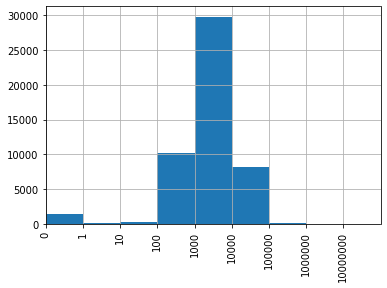

In [14]:
def power_ten(n):
    '''
    returns 0 if n = 0 or the largest power of ten smaller than or equal to n
    n: natural integer or positive float or 0.
    '''
    if np.isnan(n):
        return np.nan
    elif n==0:
        return 0
    else:
        return 10**(int(np.log(n)/np.log(10)))

power_ten_prices = autos['price_$'].apply(power_ten)
counts_prices = power_ten_prices.value_counts().sort_index()
ax = counts_prices.plot.bar(x='price ($)', y='count', width=1, align='edge', grid=True)
ax.set_xlim(0,len(counts_prices))
plt.show()

There are very few vahicles cheaper than \\$100 or more expensive than \\$1,000,000. 
Those seem to be outlier, and may indicate errors n the data.
Let us thus remove the proces of vehicles indicated cheaper than \\$100 or more expensive than \\$1,000,000. 

In [15]:
price_min = 10**2
price_max = 10**6
autos.loc[-autos['price_$'].between(price_min,price_max),'price_$'] = np.nan
autos['price_$'].describe()

count     48227.000000
mean       5992.208099
std       11994.952272
min         100.000000
25%        1250.000000
50%        3000.000000
75%        7499.000000
max      999999.000000
Name: price_$, dtype: float64

Let us now deal with the column `odometer_km`:

In [16]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

It seems that most values are equal to 150,000. Let us see this more precisely: 

In [17]:
autos['odometer_km'].value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

This column has only 13 unique values, and tthe value 150,000 is by far the most represented. However, the other values look fine.  

### Date columns

There are five columns with dates as entries: 
* `date_crawled`, added by the crawler, 
* `registration_year`, obtained from the website,
* `registration_month`, obtained from the website,
* `ad_created`, obtained from the website,
* `last_seen`, added by the crawler.
The columns `registration_year` and `registration_month` contain int values while the other three contain string values. 
Let us focus on the columns containing strings. 

In [21]:
autos[['date_crawled', 'ad_created', 'last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


It seems that the first 10 characters give the date in the year-month-day format. 
We now look at the distribution of day in percentage within each column, using the function `print_percent_dates` defined below:

In [48]:
from IPython.display import display, HTML

def print_percent_dates(name_column):
    '''
    prints the frequency in % of each date appearing in the column name_column 
    of the dataset autos
    
    name_column: string 
    '''
    # normalize=True gives the proportion of each value
    # multiplying by 100 gives percentages
    # the dates are sorted in ascending order
    title = 'Dates in {}:\n'
    print(title.format(name_column))
    (autos[name_column].str[:10].value_counts(normalize=True, dropna=False).sort_index()*100).plot(rot=90, grid=True)
    print(autos[name_column].str[:10].value_counts(normalize=True, dropna=False).sort_index()*100)

We first apply it to the column `date_crawled`:

Dates in date_crawled:

2016-03-05    2.538
2016-03-06    1.394
2016-03-07    3.596
2016-03-08    3.330
2016-03-09    3.322
2016-03-10    3.212
2016-03-11    3.248
2016-03-12    3.678
2016-03-13    1.556
2016-03-14    3.662
2016-03-15    3.398
2016-03-16    2.950
2016-03-17    3.152
2016-03-18    1.306
2016-03-19    3.490
2016-03-20    3.782
2016-03-21    3.752
2016-03-22    3.294
2016-03-23    3.238
2016-03-24    2.910
2016-03-25    3.174
2016-03-26    3.248
2016-03-27    3.104
2016-03-28    3.484
2016-03-29    3.418
2016-03-30    3.362
2016-03-31    3.192
2016-04-01    3.380
2016-04-02    3.540
2016-04-03    3.868
2016-04-04    3.652
2016-04-05    1.310
2016-04-06    0.318
2016-04-07    0.142
Name: date_crawled, dtype: float64


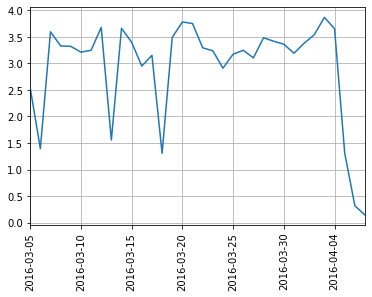

In [49]:
print_percent_dates('date_crawled')

Ads have been crawled every day from 05/03/2016 to 07/04/2016, at a nearly constant rate apart from three hollows on 06/03/2016, 13/03/2016, and 18/03/2016, and a sharply reduced rate during the last three days.

Let us now do the same for the column `ad_created`:

Dates in ad_created:

2015-06-11    0.002
2015-08-10    0.002
2015-09-09    0.002
2015-11-10    0.002
2015-12-05    0.002
2015-12-30    0.002
2016-01-03    0.002
2016-01-07    0.002
2016-01-10    0.004
2016-01-13    0.002
2016-01-14    0.002
2016-01-16    0.002
2016-01-22    0.002
2016-01-27    0.006
2016-01-29    0.002
2016-02-01    0.002
2016-02-02    0.004
2016-02-05    0.004
2016-02-07    0.002
2016-02-08    0.002
2016-02-09    0.004
2016-02-11    0.002
2016-02-12    0.006
2016-02-14    0.004
2016-02-16    0.002
2016-02-17    0.002
2016-02-18    0.004
2016-02-19    0.006
2016-02-20    0.004
2016-02-21    0.006
              ...  
2016-03-09    3.324
2016-03-10    3.186
2016-03-11    3.278
2016-03-12    3.662
2016-03-13    1.692
2016-03-14    3.522
2016-03-15    3.374
2016-03-16    3.000
2016-03-17    3.120
2016-03-18    1.372
2016-03-19    3.384
2016-03-20    3.786
2016-03-21    3.772
2016-03-22    3.280
2016-03-23    3.218
2016-03-24    2.908
2016-03-25    3.188
2016-03-26    3.25

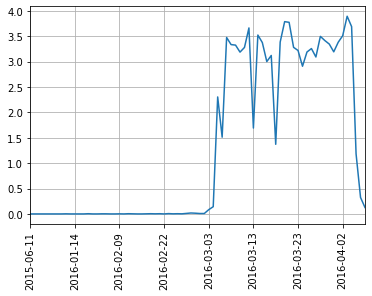

In [50]:
print_percent_dates('ad_created')

The range of dates is much longer, going from 11/06/2015 to 07/04/2016. 
However, the number of ads created before 03/2016 is very low. 
One possible reason is that most of the ads created before have been removed before the crawler was used. 
There is a sharp decrease in the number of apps created during the last three days.

We now do the same for the `last_seen` column: 

Dates in last_seen:

2016-03-05     0.108
2016-03-06     0.442
2016-03-07     0.536
2016-03-08     0.760
2016-03-09     0.986
2016-03-10     1.076
2016-03-11     1.252
2016-03-12     2.382
2016-03-13     0.898
2016-03-14     1.280
2016-03-15     1.588
2016-03-16     1.644
2016-03-17     2.792
2016-03-18     0.742
2016-03-19     1.574
2016-03-20     2.070
2016-03-21     2.074
2016-03-22     2.158
2016-03-23     1.858
2016-03-24     1.956
2016-03-25     1.920
2016-03-26     1.696
2016-03-27     1.602
2016-03-28     2.086
2016-03-29     2.234
2016-03-30     2.484
2016-03-31     2.384
2016-04-01     2.310
2016-04-02     2.490
2016-04-03     2.536
2016-04-04     2.462
2016-04-05    12.428
2016-04-06    22.100
2016-04-07    13.092
Name: last_seen, dtype: float64


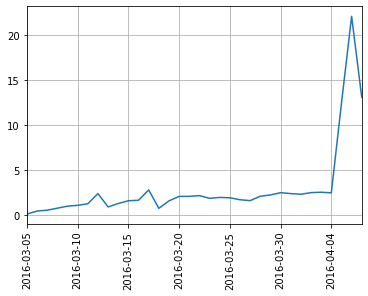

In [51]:
print_percent_dates('last_seen')

The range of dates is 05/03/2016 to 07/04/2016: the same ad for the `date_crawled` column. 
The number of ads per day shows a slow increase followed by a sharp peak corresponding to the last three days.

We now describe the `registration_year` column; 

In [52]:
autos['registration_year'].describe()

count    50000.000000
mean      2005.073280
std        105.712813
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

The minimum and maximum values are clearly wrong: there were no modern cars in year 1000 and the website can't have known about vehicles registered after 2016 at the time the crawler was used. 
We should remove the value for cars marked as registered after 2016, as these can't be accurate. 
We should also remove too early values. 
It is difficult to give a precise lower bound for the acceptable registration year. 
However from the heading of the section Histoy of [this Wikipedia page](https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_Germany#History) (seen on 22/10/2019 at 22:27 GMT), the first German license plates were issued in 1906. 
We shall thus remove all registration years smaller than 1906.

In [54]:
registration_year_max = 2016
registration_year_min = 1906
autos.loc[-autos['registration_year'].between(registration_year_min,registration_year_max),'registration_year'] = np.nan

Let us now look at the distribution of registration years: 

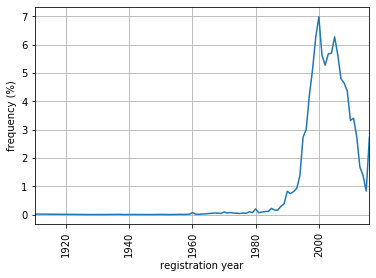

In [67]:
(autos['registration_year'].value_counts(normalize=True).sort_index()*100).plot(
    rot=90, grid=True)
plt.xlabel('registration year')
plt.ylabel('frequency (%)')
plt.show()

Most cars have been reistered between 1990 and 2016. The year having seen the highest number of registrations is the year 2000. 
There is a drop in registrations after 2005, which may be due to the fact that cars sold online are second-hand, and thus typically older.